# Interactive Bars Visualization

## Idea description
This task is inspired by the visuzlization method described in the article:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

<b>Briefly</b>: While it is easy to compare the heights of two bars, it can be difficult to compute the probability of a nearly-overlapping set of uncertainty regions. 
A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). <br>
One of the solutions the authors propose for this problem is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


## Implementation task
* Implement the bar coloring, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

* Add interactivity, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.



In [77]:
import pandas as pd
import numpy as np

np.random.seed(12345)

# Generating data for the graphs
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#df = df.transpose()
df.head()


,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [78]:
df_mean_list = list(df.mean(axis=1))
#df_mean_err =  df.sem(axis=1) #[x*0.05 for x in df_mean]
years = [1992, 1993, 1994, 1995]


In [79]:
# generate means values
def generate_means(n=1000):
    df_mean = pd.DataFrame(index=[1992,1993,1994,1995])
    for idx in range(0, n):
        df_sample = pd.DataFrame([np.random.normal(32000,200000,3650), 
                       np.random.normal(43000,100000,3650), 
                       np.random.normal(43500,140000,3650), 
                       np.random.normal(48000,70000,3650)], 
                      index=[1992,1993,1994,1995])
        
        df_sample_err = df_sample.mean(axis=1)
        df_mean[idx] = df_sample_err
    
    return df_mean

#df_mean = generate_means(n=1000)

#df_mean_sem = df_mean.sem(axis=1)
#df_mean_sem.head()

In [80]:
from scipy.stats import norm
df_sem = df.sem(axis = 1)
df_mean_err = df.sem(axis = 1) * norm.ppf(0.975)
#df_mean_err

In [81]:
%matplotlib notebook

In [82]:
# the easier version of the implementation (only 3 fixed colors are used)
def bar_set_color_easy(bars, y, df_err=df_mean_err):
    for bar, yerr in zip(bars, df_err):
        bar_value = bar.get_height()
        #print(bar_value-yerr)
        if (y_selected < bar_value-yerr):
            bar.set_color('red')
        elif (y_selected > bar_value+yerr):
            bar.set_color('blue')
        else:
            bar.set_color('yellow')
            

In [83]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt

cm = plt.get_cmap('coolwarm') 

def bar_set_color(bars, y):
    """ Set bars colors using color map.
    Color depends on how far y_value is from mean value """
    
    for bar, idx in zip(bars, range(0,len(bars))):
        bar_value = bar.get_height()
        delta = bar_value - y 
        
        delta_max = df_sem.iloc[idx] * norm.ppf(0.99)
        
        cNorm  = colors.Normalize(vmin=-delta_max, vmax=delta_max)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        
        color_cm = scalarMap.to_rgba(delta)
        bar.set_color(color_cm)


In [86]:
## Detect y_value based on user input
def onclick(event):
    y_selected = event.ydata
    axs2.cla()

    _ = axs2.plot([1991, 1996], [y_selected, y_selected], '-g')
    #axs2.set_xlim(my_xlim)
    axs2.set_ylim(my_ylim)
    axs2.xaxis.set_ticks([])
    axs2.yaxis.set_ticks([])
 
    bar_set_color(bars, y_selected)
    plt.title('Compare each bar to a fixed value (y={}).\nThe user can move the line '.format(int(y_selected)))
    
    ## Save the image
    #plt.gcf().savefig(f"Bars_coloring_{int(y_selected)}.png", facecolor='#ededef')
    

<IPython.core.display.Javascript object>


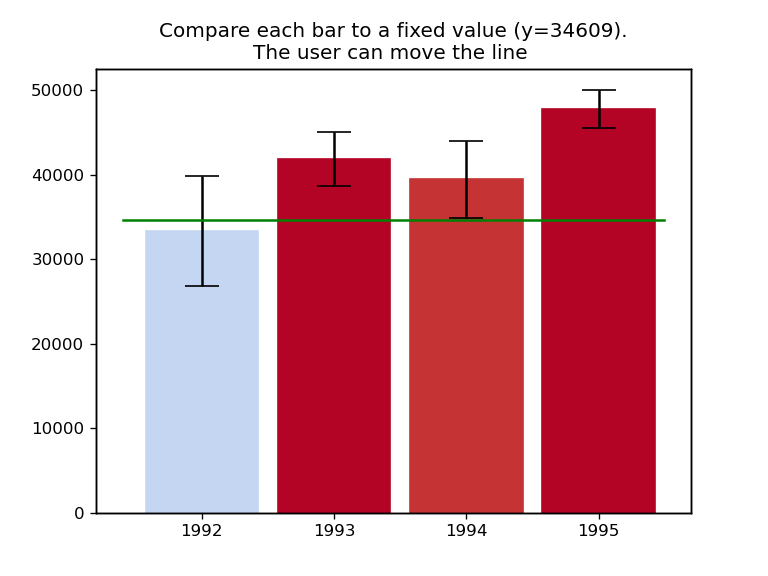

In [87]:
fig, axs = plt.subplots()

bars = axs.bar(years, df_mean_list, width=0.85, yerr=df_mean_err, capsize=10)
my_xlim = axs.set_xlim([1991.2, 1995.7])
my_ylim = axs.get_ylim()
axs.xaxis.set_ticks(years)
axs2 = axs.twinx().twiny()
#axs2.boxplot([df_mean.loc[1992], df_mean.loc[1993], df_mean.loc[1994], df_mean.loc[1995]], 
#                positions=years, whis='range') #[5, 95], showfliers=False) #, widths=0.75, showbox=False); 
#axs2.set_xlim(my_xlim)
#axs2.set_ylim(my_ylim)
axs2.xaxis.set_ticks([])
axs2.yaxis.set_ticks([])


# default value of y_selected
y_selected = 34000
#axs2.cla()
_ = axs2.plot([1991, 1996], [y_selected, y_selected], '-g')
#axs2.set_xlim(my_xlim)
axs2.set_ylim(my_ylim)
_ = axs2.xaxis.set_ticks([])
_ = axs2.yaxis.set_ticks([])

bar_set_color(bars, y_selected)

plt.title('Compare each bar to a fixed value (y={}).\nThe user can move the line'.format(y_selected))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
_ = plt.gcf().canvas.mpl_connect('button_press_event', onclick)
